In [1]:
# path https://reiknistofnun.sharepoint.com/sites/rolfssonlaboratorycommon-hi/Shared%20Documents/General/Projects/Endotheliomics/Alexia/EC-072%20catecholamine-mets/LIPIDOMICS_TARGETED

In [2]:
import pandas, seaborn, numpy

In [3]:
import scipy, scipy.stats

In [4]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

In [5]:
inputfile = 'EC_72_lipidomic_targeted_12102024.xlsx'

In [6]:
# explore qn, is and pools

In [7]:
df = pandas.read_excel(inputfile)
df

,ID,Experiment,Type,Injection order,Mode,Sample ID,Treatment,TIME,Experiment,BATCH,...,Compound 142: Lanosterol fragment +H-H2O,Compound 143: Lanosterol fragment +H-H2O off Cholesterol esters,Compound 144: CE 12:0 +H-H2O,Compound 145: CE 14:0 +H-H2O,Compound 146: CE 14:1 +H-H2O,Compound 149: CE 16:1+H-H2O,Compound 150: CE 16:2 +H-H20,Compound 151: CE 18:0 +H-H2O,Compound 152: CE 18:1 +H-H2O,Compound 153: CE 18:2 +H-H2O
0,95_Pool_Pool,EC72,Lipidomics,95,POS,Pool,Pool,NaN,2,B2_1,...,136.372,254.441,40.392,121.166,20.620,5.030,130.945,1.281,6.623,7.072
1,97_5 uM epi:nor_072-153,EC72,Lipidomics,97,POS,072-153,5 uM epi:nor,24.0,2,B2_1,...,8.710,3.332,108.898,102.777,15.813,12.504,8.496,8.608,0.749,1.232
2,98_TNFa_072-156,EC72,Lipidomics,98,POS,072-156,TNFa,24.0,2,B2_1,...,104.516,273.187,28.950,148.117,34.765,38.504,182.226,1.372,1.700,1.313
3,99_5 uM nor_072-150,EC72,Lipidomics,99,POS,072-150,5 uM nor,24.0,2,B2_1,...,85.775,192.175,144.414,105.133,36.961,25.145,134.718,1.909,2.164,1.697
4,100_5 uM epi:nor_072-138,EC72,Lipidomics,100,POS,072-138,5 uM epi:nor,4.0,2,B2_1,...,140.757,1009.222,568.578,388.709,272.210,71.240,758.354,1.582,3.233,4.835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,402_5 uM epi_072-43,EC72,Lipidomics,402,POS,072-43,5 uM epi,4.0,1,B1_2,...,59.353,59.353,13.344,23.718,7.066,6.551,21.018,3.316,0.464,1.383
152,403_5 uM nor_072-61,EC72,Lipidomics,403,POS,072-61,5 uM nor,24.0,1,B1_2,...,222.137,222.137,58.233,15.116,64.905,0.791,119.737,5.045,1.323,NaN
153,404_TNFa_072-51,EC72,Lipidomics,404,POS,072-51,TNFa,4.0,1,B1_2,...,199.398,199.398,47.213,125.114,76.041,4.701,154.373,0.459,2.722,NaN
154,405_TNFa_072-53,EC72,Lipidomics,405,POS,072-53,TNFa,4.0,1,B1_2,...,284.417,284.417,56.332,90.531,81.664,29.060,237.837,0.205,1.294,3.435


In [8]:
batches = list(df['BATCH'].unique())
batches.sort()
batches

['B1_1', 'B1_2', 'B2_1', 'B2_2']

In [9]:
bdf = df[df['BATCH'] == batches[0]]
bdf0 = bdf[bdf['Treatment'] == 'Pool']
bdf1 = bdf[bdf['Treatment'] != 'Pool']
bdf0

,ID,Experiment,Type,Injection order,Mode,Sample ID,Treatment,TIME,Experiment,BATCH,...,Compound 142: Lanosterol fragment +H-H2O,Compound 143: Lanosterol fragment +H-H2O off Cholesterol esters,Compound 144: CE 12:0 +H-H2O,Compound 145: CE 14:0 +H-H2O,Compound 146: CE 14:1 +H-H2O,Compound 149: CE 16:1+H-H2O,Compound 150: CE 16:2 +H-H20,Compound 151: CE 18:0 +H-H2O,Compound 152: CE 18:1 +H-H2O,Compound 153: CE 18:2 +H-H2O
78,283_POOL_POOL,EC72,Lipidomics,283,POS,Pool,Pool,NaN,1,B1_1,...,72.938,233.045,41.443,351.629,22.830,71.540,135.208,1.934,9.253,20.036
86,293_POOL_POOL,EC72,Lipidomics,293,POS,Pool,Pool,NaN,1,B1_1,...,447.473,1674.923,558.644,2152.232,927.729,493.964,4063.468,4.808,5.840,4.682
94,303_POOL_POOL,EC72,Lipidomics,303,POS,Pool,Pool,NaN,1,B1_1,...,97.457,168.502,10.148,251.448,43.380,4.871,79.680,0.237,2.619,NaN
102,313_POOL_POOL,EC72,Lipidomics,313,POS,Pool,Pool,NaN,1,B1_1,...,429.703,1111.049,176.727,2907.301,347.962,25.985,2120.937,2.621,4.420,9.640
110,323_POOL_POOL,EC72,Lipidomics,323,POS,Pool,Pool,NaN,1,B1_1,...,341.739,1257.043,466.065,299.884,864.063,36.851,3507.578,3.616,5.147,9.937
116,331_POOL_POOL,EC72,Lipidomics,331,POS,Pool,Pool,NaN,1,B1_1,...,489.218,1226.893,133.950,2565.654,339.495,210.457,1771.206,10.900,1.889,19.729


In [10]:
new = bdf0.drop(['ID', 'Experiment', 'Experiment ', 'Type', 'Mode', 'Sample ID', 'Treatment', 'TIME', 'BATCH'], axis=1) # oh yes
new.set_index('Injection order', inplace=True)
new2 = new.transpose()
log10new2 = numpy.log10(new2)

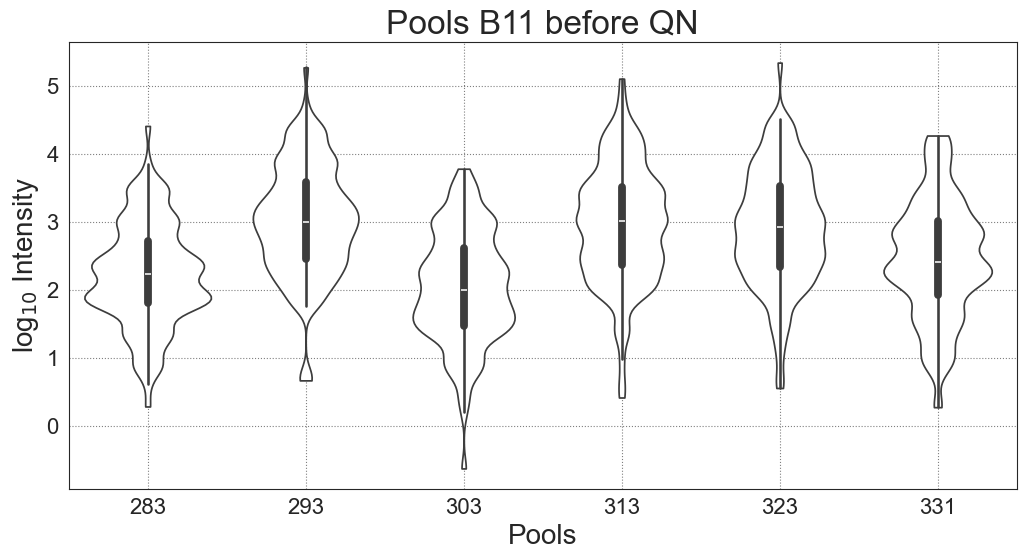

In [11]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log10new2, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Pools', title='Pools B11 before QN')
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [12]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log10new2.values, axis=0), 
                             index=log10new2.index, 
                             columns=log10new2.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log10new2.rank(method="min").stack().astype(int).map(df_mean).unstack()

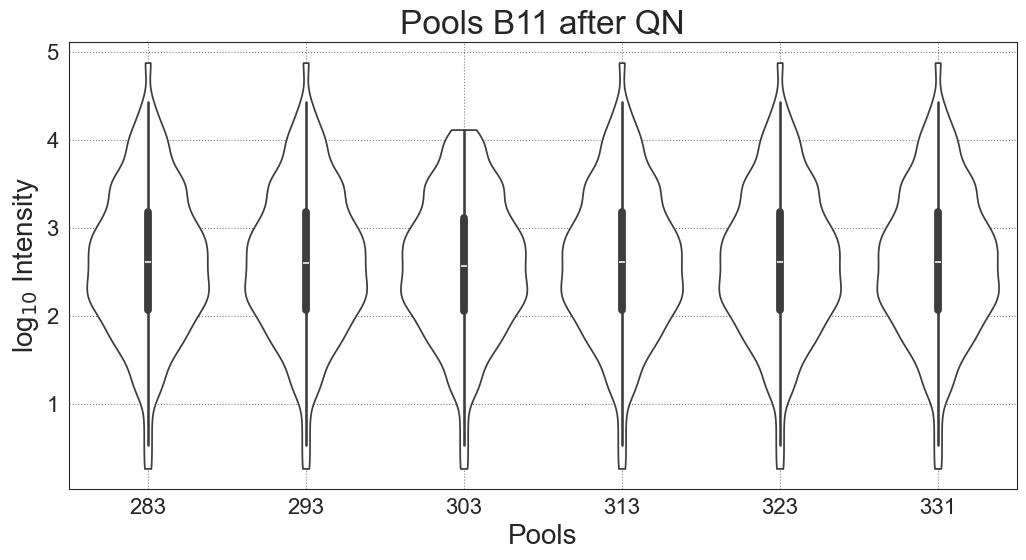

In [13]:
g = seaborn.violinplot(data=df_qn, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Pools', title='Pools B11 after QN')
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [14]:
new = bdf1.drop(['ID', 'Experiment', 'Experiment ', 'Type', 'Mode', 'Sample ID', 'Treatment', 'TIME', 'BATCH'], axis=1) # oh yes
new.set_index('Injection order', inplace=True)
new2 = new.transpose()
log10new2 = numpy.log10(new2)

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_26709/2400321944.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(tk, fontsize=10)


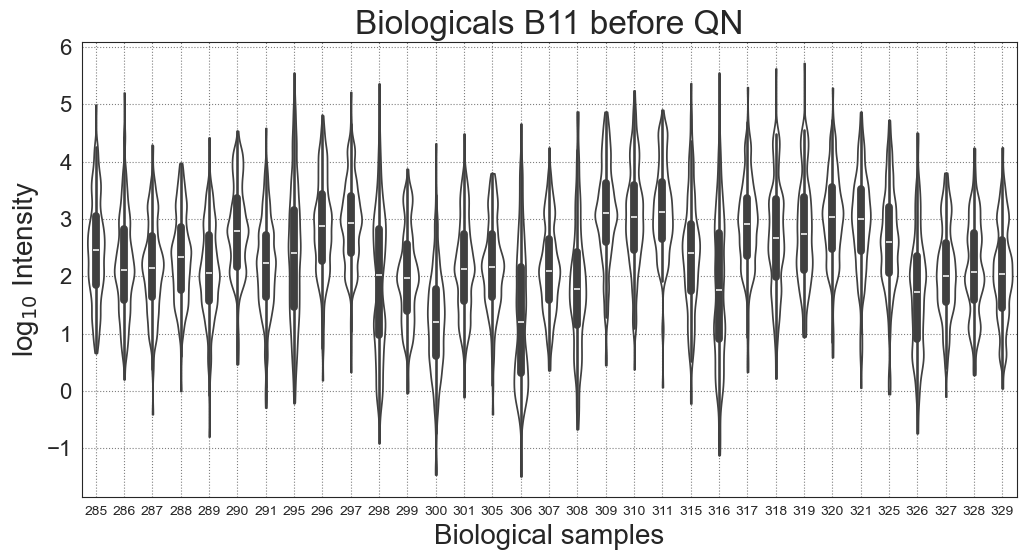

In [15]:
seaborn.set_style("white")
g = seaborn.violinplot(data=log10new2, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Biological samples', title='Biologicals B11 before QN')
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
tk = g.get_xticklabels()
g.set_xticklabels(tk, fontsize=10)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [16]:
###
### quantile normalization |  taken from https://cmdlinetips.com/2020/06/computing-quantile-normalization-in-python/
###

# step 1/3: sorting sample values
df_sorted = pandas.DataFrame(numpy.sort(log10new2.values, axis=0), 
                             index=log10new2.index, 
                             columns=log10new2.columns)
# step 2/3: averaging rank values across samples
df_mean = df_sorted.mean(axis=1)
df_mean.index = numpy.arange(1, len(df_mean) + 1)
# step 3/3: re-ordering samples
df_qn = log10new2.rank(method="min").stack().astype(int).map(df_mean).unstack()

/var/folders/j2/645ctp717nv8rwbn2dsccyxh0000gn/T/ipykernel_26709/142092113.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(tk, fontsize=10)


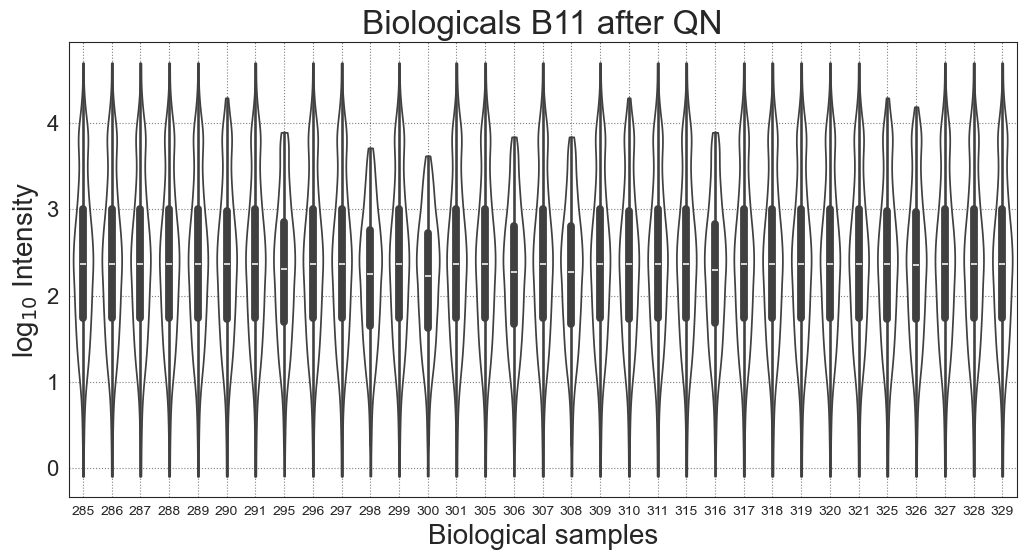

In [17]:
seaborn.set_style("white")
g = seaborn.violinplot(data=df_qn, cut=0, bw_method='scott', bw_adjust=1/2, density_norm='area', color='white', common_norm=True)
g.set(ylabel='log$_{10}$ Intensity', xlabel='Biological samples', title='Biologicals B11 after QN')
matplotlib.pyplot.grid(ls=':', color='black', alpha=1/2)
tk = g.get_xticklabels()
g.set_xticklabels(tk, fontsize=10)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.show()

In [18]:
df_qn

Injection order,285,286,287,288,289,290,291,295,296,297,...,317,318,319,320,321,325,326,327,328,329
Compound 1: IS_LPC_17:0,2.262108,2.332323,2.093967,2.093967,1.732412,2.262108,1.807606,2.833057,2.262108,1.783051,...,1.991498,2.315963,2.262108,1.754195,1.820665,2.554934,3.410244,2.262108,2.072180,2.449561
Compound 2: IS_LPC_19:0,3.715305,3.830792,3.719676,3.843783,3.467247,3.715305,3.183120,3.623114,3.555812,3.248992,...,3.623114,3.719676,3.653999,3.371408,3.248992,3.915984,4.109278,3.653999,3.715305,3.896091
Compound 3: IS_TAG 17:0/17:0/17:0,2.653047,2.710790,2.962723,2.590186,3.887117,2.240802,2.855056,3.410244,2.774725,3.088036,...,3.048868,2.833057,3.274853,3.121846,2.931530,2.364004,3.211794,2.731072,3.873117,2.590186
Compound 6: IS_PC_17:0/17:0,4.192922,4.296218,4.192922,4.192922,3.969582,4.023514,4.192922,3.830792,3.873117,3.915984,...,4.109278,4.023514,4.296218,4.023514,3.830792,3.555812,3.969582,4.701107,3.830792,4.109278
Compound 7: IS_PC_19:0/19:0,3.873117,3.211794,3.467247,3.653999,3.371408,3.555812,3.248992,3.771122,3.371408,2.855056,...,2.731072,4.109278,4.023514,3.715305,3.467247,3.016510,3.915984,3.830792,2.653047,3.211794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Compound 149: CE 16:1+H-H2O,1.783051,1.909113,1.861089,1.557795,0.263071,-0.098802,0.490743,1.425966,1.807606,1.949682,...,0.490743,1.754195,1.909113,1.807606,1.212286,-0.098802,0.943368,0.649717,2.695668,1.271003
Compound 150: CE 16:2 +H-H20,2.855056,2.554934,2.590186,2.774725,3.088036,2.315963,3.371408,2.093967,3.048868,2.469017,...,1.968631,2.469017,2.379127,3.088036,3.320064,3.410244,2.364004,2.710790,4.023514,2.653047
Compound 151: CE 18:0 +H-H2O,0.263071,-0.098802,0.263071,-0.098802,-0.098802,0.263071,0.866225,1.104951,0.490743,0.263071,...,0.649717,-0.098802,0.649717,0.263071,0.263071,0.490743,0.490743,0.490743,1.144372,1.104951
Compound 152: CE 18:1 +H-H2O,0.866225,0.263071,-0.098802,0.263071,0.490743,0.490743,0.263071,1.532402,-0.098802,0.490743,...,0.263071,0.263071,0.263071,0.490743,-0.098802,0.263071,NaN,0.263071,-0.098802,-0.098802


In [19]:
df['Treatment'].unique()

array(['Pool', '5 uM epi:nor', 'TNFa', '5 uM nor', '0uM', '0 uM',
       '5 uM epi'], dtype=object)

In [20]:
df[df['Treatment'] == '0 uM']

,ID,Experiment,Type,Injection order,Mode,Sample ID,Treatment,TIME,Experiment,BATCH,...,Compound 142: Lanosterol fragment +H-H2O,Compound 143: Lanosterol fragment +H-H2O off Cholesterol esters,Compound 144: CE 12:0 +H-H2O,Compound 145: CE 14:0 +H-H2O,Compound 146: CE 14:1 +H-H2O,Compound 149: CE 16:1+H-H2O,Compound 150: CE 16:2 +H-H20,Compound 151: CE 18:0 +H-H2O,Compound 152: CE 18:1 +H-H2O,Compound 153: CE 18:2 +H-H2O
14,112_0 uM_072-128,EC72,Lipidomics,112,POS,072-128,0 uM,0.0,2,B2_1,...,6.897,3.541,43.698,213.594,7.972,6.183,12.833,15.910,1.744,4.213
28,130_0 uM_072-126,EC72,Lipidomics,130,POS,072-126,0 uM,0.0,2,B2_1,...,104.712,9.761,345.632,235.572,109.850,37.657,394.116,9.998,6.061,5.180
33,137_0 uM_072-127,EC72,Lipidomics,137,POS,072-127,0 uM,0.0,2,B2_1,...,21.639,467.974,438.249,282.588,149.010,43.195,495.188,13.275,1.447,3.708
53,184_0 uM_072-128,EC72,Lipidomics,184,POS,072-128,0 uM,0.0,2,B2_2,...,0.797,NaN,212.496,317.011,55.708,2.977,39.645,0.699,NaN,4.094
67,202_0 uM_072-126,EC72,Lipidomics,202,POS,072-126,0 uM,0.0,2,B2_2,...,4.143,558.272,306.282,201.197,161.723,84.860,637.832,1.013,2.975,13.915
72,209_0 uM_072-127,EC72,Lipidomics,209,POS,072-127,0 uM,0.0,2,B2_2,...,16.990,558.102,291.794,417.878,131.291,118.986,571.520,1.648,2.566,7.043
90,298_0 uM_072-37,EC72,Lipidomics,298,POS,072-37,0 uM,0.0,1,B1_1,...,1.176,1.176,77.987,10.037,26.539,20.158,18.719,3.513,6.842,10.337
92,300_0 uM_072-38,EC72,Lipidomics,300,POS,072-38,0 uM,0.0,1,B1_1,...,4.006,4.006,38.932,4.216,7.091,3.274,9.699,9.469,NaN,3.515
104,316_0 uM_072-36,EC72,Lipidomics,316,POS,072-36,0 uM,0.0,1,B1_1,...,3.578,3.578,40.032,31.210,10.237,18.324,19.157,1.464,3.967,42.272
129,374_0 uM_072-37,EC72,Lipidomics,374,POS,072-37,0 uM,0.0,1,B1_2,...,17.836,17.836,147.040,32.285,46.168,3.062,19.817,5.310,0.620,4.853


In [21]:
rules = ((df['Treatment'] == '0 uM') | (df['Treatment'] == '0uM')) & (df['BATCH'] == 'B1_1') & (df['TIME'] == 4)
control_injections = df[rules]['Injection order'].to_list()
print(len(control_injections), control_injections)
rules = (df['Treatment'] == '5 uM epi:nor') & (df['BATCH'] == 'B1_1') & (df['TIME'] == 4)
treated_injections = df[rules]['Injection order'].to_list()
print(len(treated_injections), treated_injections)

3 [295, 306, 308]
3 [285, 287, 296]


In [22]:
median_control = df_qn[control_injections].median(axis=1)
median_treated = df_qn[treated_injections].median(axis=1)

a = (10**median_control) - 1
print(a.shape)
b = (10**median_treated) - 1
print()
print(b.shape)

log2FC = numpy.log2(b + 1) - numpy.log2(a + 1)
df_qn[control_injections]

(126,)

(126,)


Injection order,295,306,308
Compound 1: IS_LPC_17:0,2.833057,2.962723,2.794590
Compound 2: IS_LPC_19:0,3.623114,3.623114,3.467247
Compound 3: IS_TAG 17:0/17:0/17:0,3.410244,3.155997,3.555812
Compound 6: IS_PC_17:0/17:0,3.830792,3.771122,3.653999
Compound 7: IS_PC_19:0/19:0,3.771122,3.653999,3.771122
...,...,...,...
Compound 149: CE 16:1+H-H2O,1.425966,NaN,1.683411
Compound 150: CE 16:2 +H-H20,2.093967,1.881073,2.049873
Compound 151: CE 18:0 +H-H2O,1.104951,1.844074,1.179559
Compound 152: CE 18:1 +H-H2O,1.532402,1.626570,1.375151


In [23]:
import statsmodels, statsmodels.stats, statsmodels.stats.multitest

Compound 1:  IS_LPC_17:0 [2.26210799 2.09396704 2.26210799] [2.83305719 2.96272311 2.79458974] -1.8966521926049822 0.0009669911087819755
Compound 2:  IS_LPC_19:0 [3.71530517 3.71967645 3.55581229] [3.62311448 3.62311448 3.46724705] 0.3062508660330643 0.28452395758789034
Compound 3:  IS_TAG 17:0/17:0/17:0 [2.65304684 2.96272311 2.77472521] [3.41024374 3.15599683 3.55581229] -2.111146857438891 0.017356773059168155
Compound 6:  IS_PC_17:0/17:0 [4.19292194 4.19292194 3.87311664] [3.83079183 3.77112161 3.65399916] 1.4011903511933692 0.04784244597411417
Compound 7:  IS_PC_19:0/19:0 [3.87311664 3.46724705 3.37140775] [3.77112161 3.65399916 3.77112161] -1.009449457953922 0.3662860528393793
Compound 9:  IS_SM_d18:1_17:0 [3.84378294 3.62311448 3.65399916] [3.65399916 3.41024374 1.84407442] 0.809737981587098 0.2662366350187592
Compound 15:  PC 30:1 [2.81357489 2.41063554 2.88650362] [2.73107172 2.71079028 3.27485305] 0.27406962202590357 0.4415108641680634
Compound 16:  PC 32:0 [3.88711663 3.83079

/Users/adrian/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/Users/adrian/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


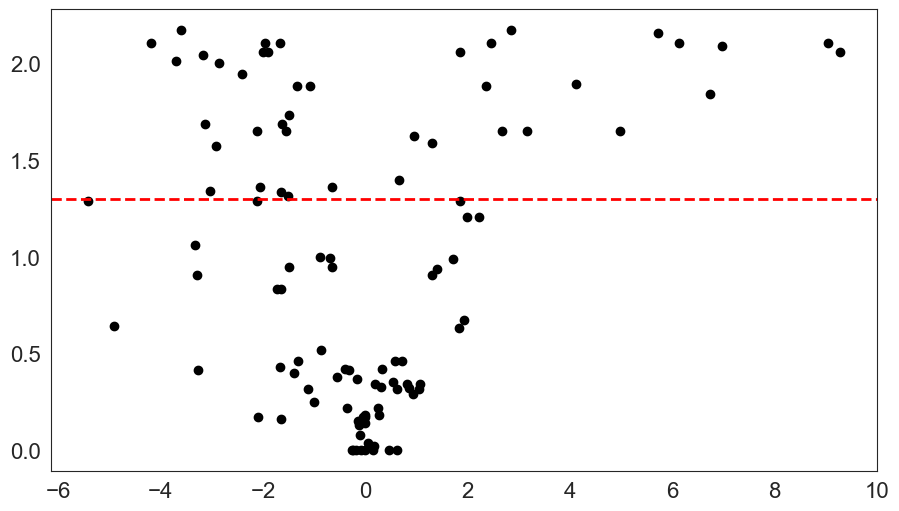

In [24]:
x = []; y = []
p = []
for compound in log2FC.index:
    a = df_qn.loc[compound, control_injections].values
    b = df_qn.loc[compound, treated_injections].values
    results = scipy.stats.ttest_ind(a, b)
    pvalue = results[1]
    if numpy.isnan(pvalue) == True:
        pvalue = 1
    p.append(pvalue)

    value_c = (10**numpy.median(a)) - 1
    value_t = (10**numpy.median(b)) - 1
    diff = numpy.log2(value_t + 1) - numpy.log2(value_c + 1)
    x.append(diff)

    print(compound, b, a, diff, pvalue)


results = statsmodels.stats.multitest.multipletests(p, alpha=0.05, method='fdr_bh')
adjusted = results[1]
y = -numpy.log10(adjusted)
matplotlib.pyplot.plot(x, y, 'o', color='black')
matplotlib.pyplot.axhline(-numpy.log10(0.05), lw=2, color='red', ls='--')
matplotlib.pyplot.show()
    


In [25]:
# TODO
# test qn function to see if it is more radical
# plot controls, then all. then normalize non pools. then volcano
# plot mean  vs sd in lin scale for qn-specific pools and controls before and after qn
# PCA with all samples
# do normalization with is as i did before with all of them and the shift
# dont forget 24h  
# consider doing for other drugs